In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kc-house-data/kc_house_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/kc-house-data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()
#df.info()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
d=df.isnull().sum()
print(d)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [5]:
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#dropping irrelevant columns
df.drop('id',axis=1,inplace=True)
df.drop('date',axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
from sklearn import preprocessing
#MinMax scaler is used to normalize 
y=df['price'] #setting y=price as a target variable 

#setting up the normalizer scaler
m_scaler=preprocessing.MinMaxScaler()
col=df.drop('price',axis=1)
col=df.drop('sqft_above',axis=1).columns[:]

x=df.loc[:,col] #selecting x as the dataframe of the 
#location mentioned(here col- all columns excluding price )

#normalize x
x=pd.DataFrame(data=m_scaler.fit_transform(x),columns=col)

x.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


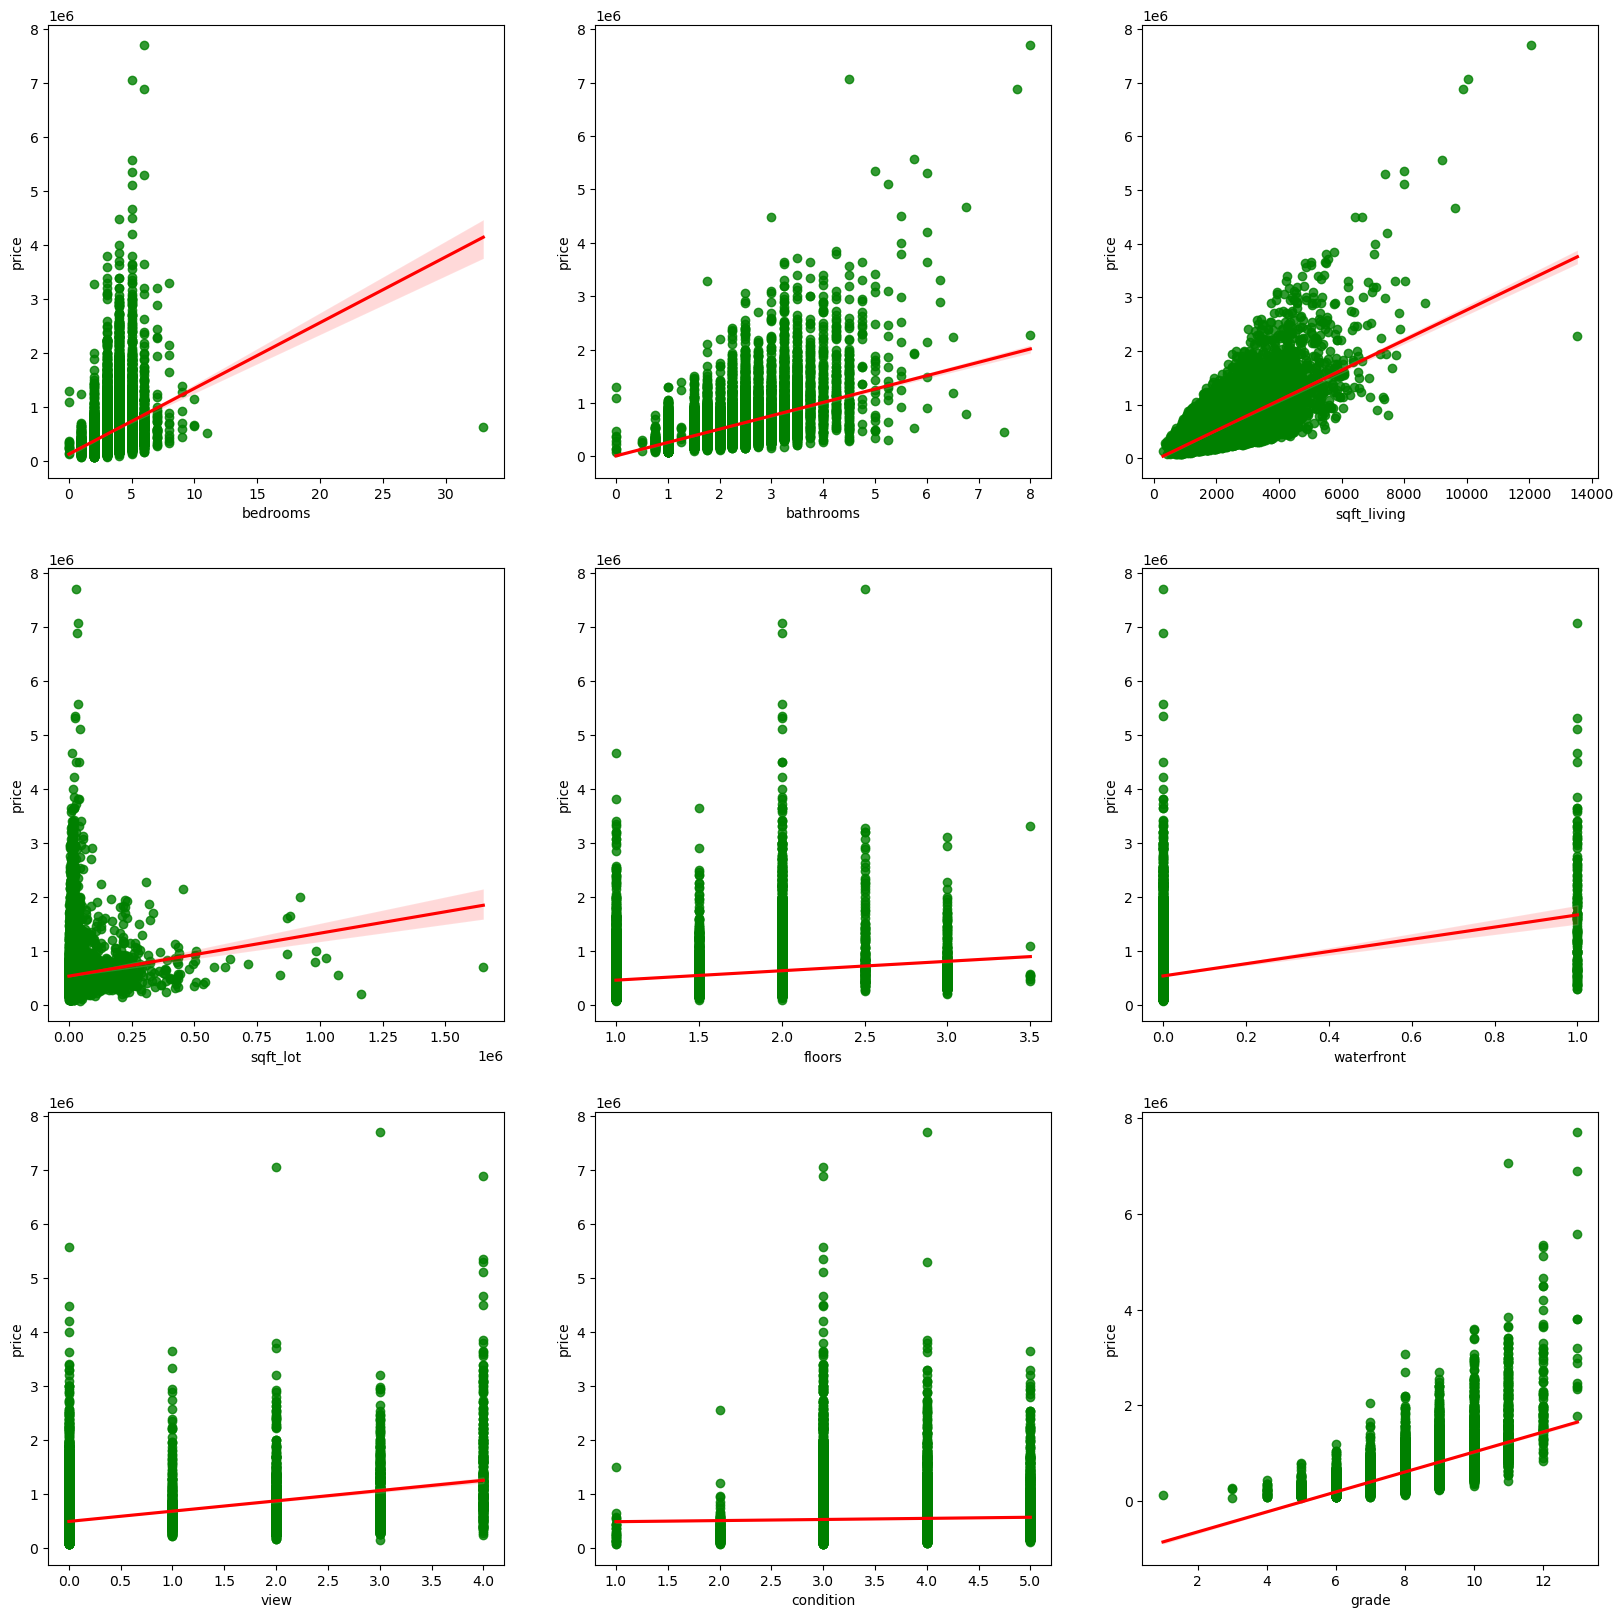

<Figure size 1000x800 with 0 Axes>

In [8]:
#plotting using seaborn
fg,axs=plt.subplots(ncols=3,nrows=3,figsize=(20,20))
plt.figure(figsize=(10,8))
sns.regplot(y=df['price'],x=df['bedrooms'],data=df,ax=axs[0,0],scatter_kws={"color":"green"},line_kws={'color':'red'})
sns.regplot(y=df['price'],x=df['bathrooms'],data=df,ax=axs[0,1],scatter_kws={"color":"green"},line_kws={'color':'red'})
sns.regplot(y=df['price'],x=df['sqft_living'],data=df,ax=axs[0,2],scatter_kws={"color":"green"},line_kws={'color':'red'})
sns.regplot(y=df['price'],x=df['sqft_lot'],data=df,ax=axs[1,0],scatter_kws={"color":"green"},line_kws={'color':'red'})
sns.regplot(y=df['price'],x=df['floors'],data=df,ax=axs[1,1],scatter_kws={"color":"green"},line_kws={'color':'red'})
sns.regplot(y=df['price'],x=df['waterfront'],data=df,ax=axs[1,2],scatter_kws={"color":"green"},line_kws={'color':'red'})
sns.regplot(y=df['price'],x=df['view'],data=df,ax=axs[2,0],scatter_kws={"color":"green"},line_kws={'color':'red'})
sns.regplot(y=df['price'],x=df['condition'],data=df,ax=axs[2,1],scatter_kws={"color":"green"},line_kws={'color':'red'})
sns.regplot(y=df['price'],x=df['grade'],data=df,ax=axs[2,2],scatter_kws={"color":"green"},line_kws={'color':'red'})
sns.set_style('darkgrid')
plt.tight_layout()


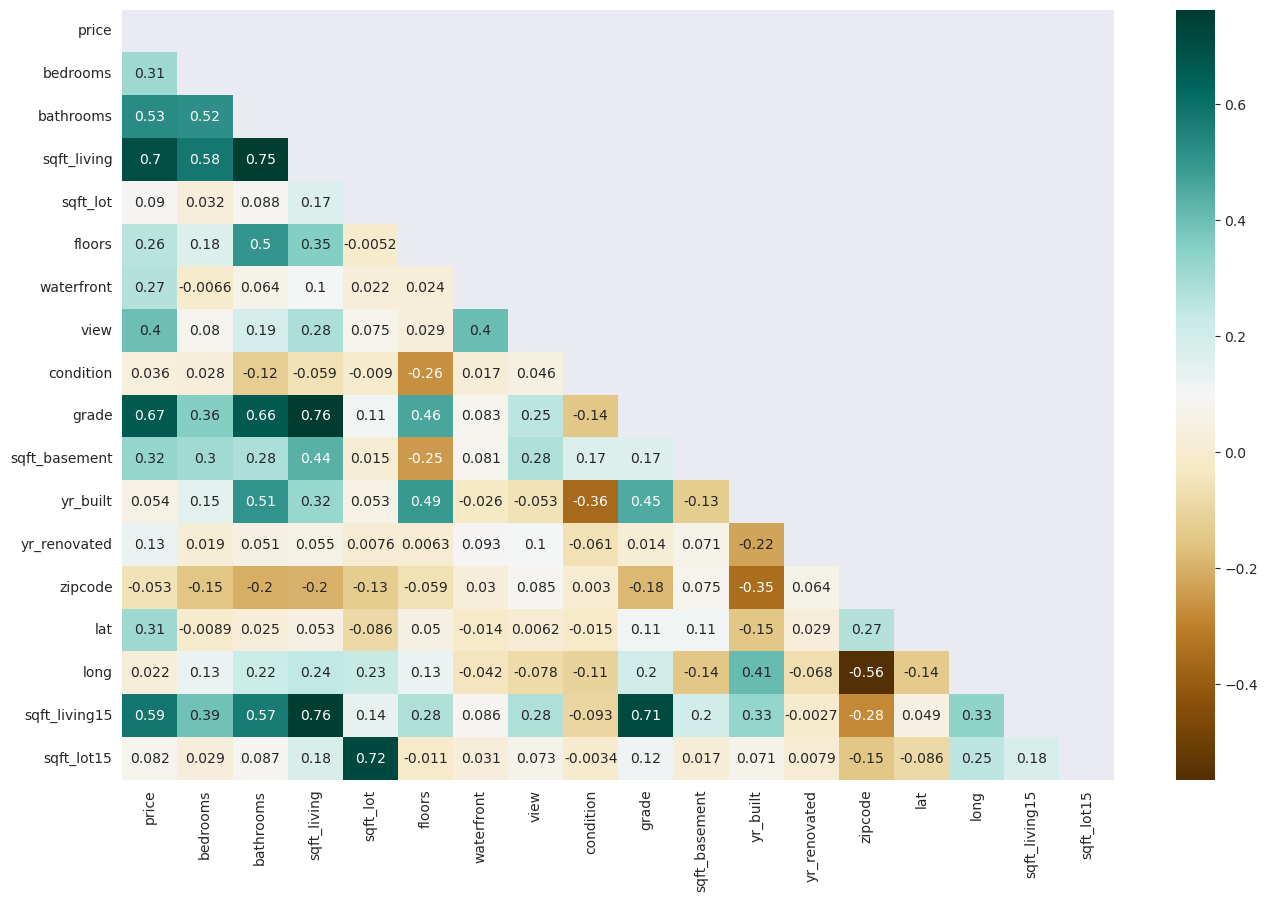

In [9]:
plt.figure(figsize=(16,10))
df=df.drop('sqft_above',axis=1)
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
sns.heatmap(df.corr(),mask=mask,annot=True,cmap="BrBG")
plt.show()


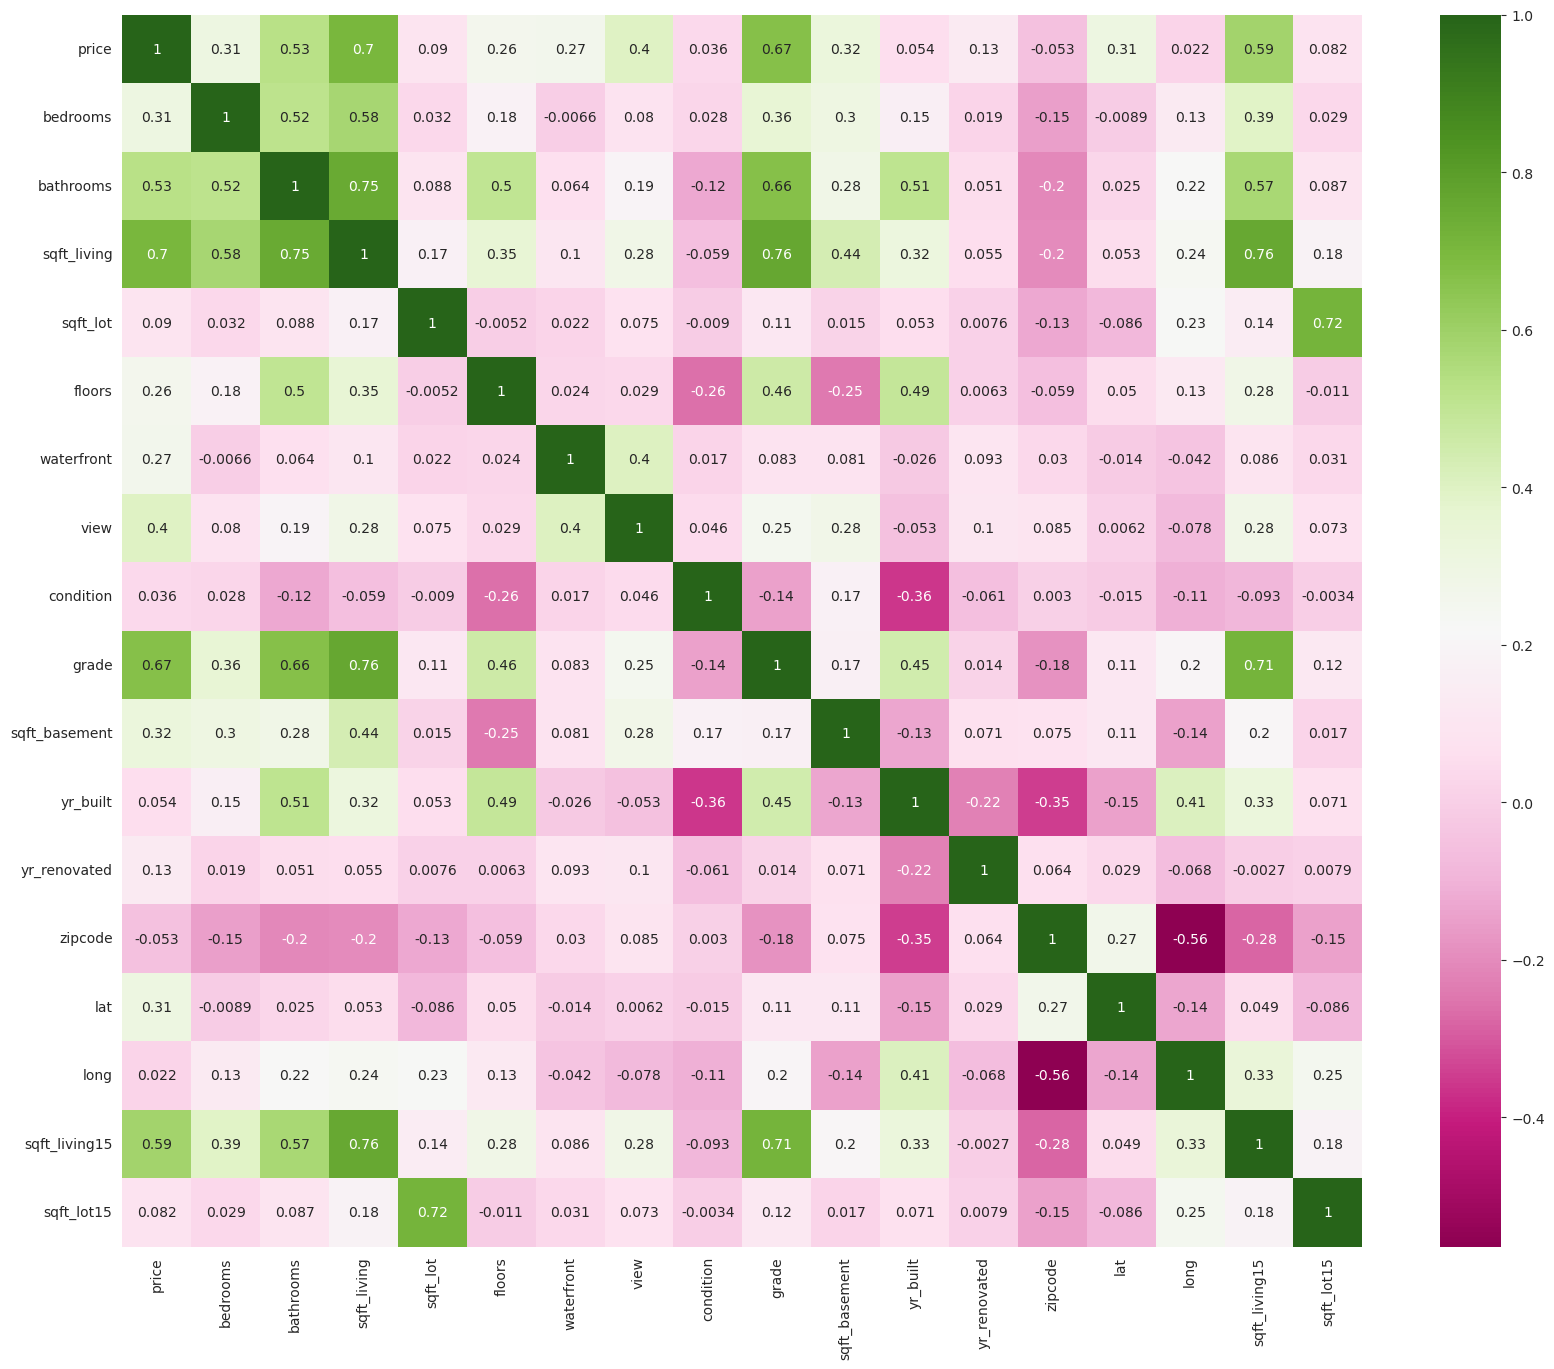

In [10]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True,cmap="PiYG")
plt.show()


<AxesSubplot:>

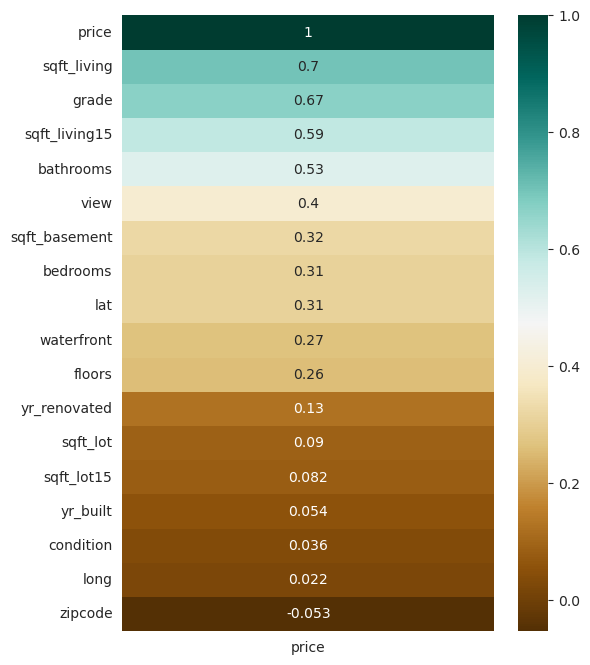

In [11]:
#correlation of features with target feature arranged in descending order
df.corr()[['price']].sort_values(by='price', ascending=False)
plt.figure(figsize=(6,8))
sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False),cmap='BrBG',annot=True)
#correlation to decide the most important features

In [12]:
from sklearn.model_selection import train_test_split
features=df.drop('price',axis=1)
target=df['price']
train_features,test_features,train_target,test_target=train_test_split(features,target,test_size=0.2,random_state=5)
print("Train features shape : ", train_features.shape)
print("Train target shape : ", train_target.shape)
print("Test features shape : ", test_features.shape)
print("Test target shape : ", test_target.shape)

Train features shape :  (17290, 17)
Train target shape :  (17290,)
Test features shape :  (4323, 17)
Test target shape :  (4323,)


In [13]:
#building model
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
model.fit(train_features,train_target)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [14]:
print("Model intercept ",model.intercept_)
print("Model coefficient ",model.coef_)
for i in range(len(features.columns)):
    print(features.columns[i],":",model.coef_[i])

Model intercept  4854234.914884351
Model coefficient  [-3.40486662e+04  3.99208043e+04  1.81485960e+02  1.26945231e-01
  5.31712677e+03  5.80536313e+05  5.34491895e+04  2.73257502e+04
  9.62421739e+04 -3.25677130e+01 -2.63079099e+03  2.52113985e+01
 -5.53924648e+02  6.02428201e+05 -2.07139725e+05  2.01843313e+01
 -3.84604437e-01]
bedrooms : -34048.66619180516
bathrooms : 39920.804336479756
sqft_living : 181.48596020274368
sqft_lot : 0.12694523060903995
floors : 5317.1267720197675
waterfront : 580536.3130494078
view : 53449.189520595144
condition : 27325.750200111317
grade : 96242.17390508394
sqft_basement : -32.56771295917349
yr_built : -2630.79099438754
yr_renovated : 25.211398500828086
zipcode : -553.9246482102255
lat : 602428.2014436
long : -207139.72461725047
sqft_living15 : 20.184331294024314
sqft_lot15 : -0.38460443698036045


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
train_target_pred=model.predict(train_features)
rmse=np.sqrt(mean_squared_error(train_target,train_target_pred))
r2=r2_score(train_target,train_target_pred)

output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")
print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

test_target_pred=model.predict(test_features)
rmse=np.sqrt(mean_squared_error(test_target,test_target_pred))
r2=r2_score(test_target,test_target_pred)

output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")
print("Model testing performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


           price     Predicted     Difference
3856    535000.0  6.565378e+05  121537.831622
5010    425000.0  2.881101e+05 -136889.885407
18050   800000.0  1.040959e+06  240958.963160
570     338900.0  1.799385e+05 -158961.527315
8556   1108000.0  1.121853e+06   13853.360345
19435   333000.0  4.800610e+05  147061.047069
16918   830000.0  8.112415e+05  -18758.523831
21010   525000.0  5.583593e+05   33359.343528
6156    375000.0  3.681627e+05   -6837.307092
10074   333760.0  3.486225e+05   14862.498204 

Model training performance:
---------------------------
RMSE is 200903.82760011713
R2 score is 0.6995975979008475


          price     Predicted     Difference
17485  365000.0  4.280281e+05   63028.114111
15164  225000.0  9.884708e+04 -126152.920120
18449  384950.0  4.831708e+05   98220.796663
6828   657500.0  5.907635e+05  -66736.530457
18281  959000.0  1.194735e+06  235734.862399
14625  855000.0  8.800862e+05   25086.154693
14864  575000.0  6.393338e+05   64333.811640
17257  856500.0 

In [16]:
from sklearn import linear_model
reg=linear_model.Lasso(alpha=0.1)
reg.fit(train_features,train_target)

Lasso(alpha=0.1)

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
train_target_pred=reg.predict(train_features)
rmse=np.sqrt(mean_squared_error(train_target,train_target_pred))
r2=r2_score(train_target,train_target_pred)

output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")
print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

test_target_pred=reg.predict(test_features)
rmse=np.sqrt(mean_squared_error(test_target,test_target_pred))
r2=r2_score(test_target,test_target_pred)

output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")
print("Model testing performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


           price     Predicted     Difference
3856    535000.0  6.565423e+05  121542.314060
5010    425000.0  2.881088e+05 -136891.171642
18050   800000.0  1.040959e+06  240959.347402
570     338900.0  1.799404e+05 -158959.615280
8556   1108000.0  1.121855e+06   13854.820453
19435   333000.0  4.800616e+05  147061.628929
16918   830000.0  8.112406e+05  -18759.410976
21010   525000.0  5.583593e+05   33359.336631
6156    375000.0  3.681641e+05   -6835.852415
10074   333760.0  3.486226e+05   14862.619741 

Model training performance:
---------------------------
RMSE is 200903.82760766824
R2 score is 0.6995975978782659


          price     Predicted     Difference
17485  365000.0  4.280289e+05   63028.937501
15164  225000.0  9.884858e+04 -126151.420641
18449  384950.0  4.831712e+05   98221.169575
6828   657500.0  5.907635e+05  -66736.485159
18281  959000.0  1.194732e+06  235732.149487
14625  855000.0  8.800859e+05   25085.899966
14864  575000.0  6.393330e+05   64332.976833
17257  856500.0 

In [18]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=2)
kn.fit(train_features,train_target)

KNeighborsRegressor(n_neighbors=2)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
train_target_pred=kn.predict(train_features)
rmse=np.sqrt(mean_squared_error(train_target,train_target_pred))
r2=r2_score(train_target,train_target_pred)

output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")
print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

test_target_pred=kn.predict(test_features)
rmse=np.sqrt(mean_squared_error(test_target,test_target_pred))
r2=r2_score(test_target,test_target_pred)

output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")
print("Model testing performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


           price  Predicted  Difference
3856    535000.0   535000.0         0.0
5010    425000.0   275500.0   -149500.0
18050   800000.0  1370000.0    570000.0
570     338900.0   373550.0     34650.0
8556   1108000.0   924000.0   -184000.0
19435   333000.0   684000.0    351000.0
16918   830000.0   747500.0    -82500.0
21010   525000.0   636225.0    111225.0
6156    375000.0   368000.0     -7000.0
10074   333760.0   284880.0    -48880.0 

Model training performance:
---------------------------
RMSE is 156060.63385656098
R2 score is 0.8187351014983594


          price  Predicted  Difference
17485  365000.0   350000.0    -15000.0
15164  225000.0   274975.5     49975.5
18449  384950.0   437600.0     52650.0
6828   657500.0   735750.0     78250.0
18281  959000.0   965000.0      6000.0
14625  855000.0   588850.0   -266150.0
14864  575000.0   461500.0   -113500.0
17257  856500.0   559919.0   -296581.0
11817  250000.0   396500.0    146500.0
15262  360000.0   775435.0    415435.0 

Model testi